In [74]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from streamlit import feedback

In [75]:
# Load the dataset
df=pd.read_csv(r"C:\Users\kumar\Academic_Decision_Support_System\data\synthetic\student_academic_data.csv")

In [76]:
# Display the first few rows of the dataframe
df.head()

,class,stream,previous_marks,study_hours,absences,family_support,school_support,pass_fail,physics,chemistry,biology,maths,english,computer,commerce_sub,arts_sub
0,11,Arts,50,1.358103,2,0,1,0,NaN,NaN,NaN,NaN,90,NaN,NaN,39.0
1,12,Arts,82,5.834504,11,1,0,1,NaN,NaN,NaN,NaN,51,NaN,NaN,27.0
2,9,General,89,2.514990,13,0,1,1,83.0,66.0,NaN,82.0,46,73.0,NaN,NaN
3,12,Arts,36,1.437883,6,0,1,0,NaN,NaN,NaN,NaN,80,NaN,NaN,27.0
4,10,General,73,3.223473,14,0,0,1,84.0,95.0,NaN,33.0,77,26.0,NaN,NaN


In [77]:
#define subject columns
subject_cols = [
    "maths", "english", "physics", "chemistry",
    "biology", "computer", "commerce_sub", "arts_sub"
]
df["avg_marks"] =( df[subject_cols].mean(axis=1))*2


In [113]:
# Defing weak area detection function and applying it to the dataframe
def detect_weak_subjects(row):
    weak = []
    critical = []
    
    for sub in subject_cols:
        if sub in row and not pd.isna(row[sub]):
            if row[sub] < 40:
                critical.append(sub)
            elif row[sub] < 55:
                weak.append(sub)
    
    return weak, critical

df["weak_subjects"], df["critical_subjects"] = zip(
    *df.apply(detect_weak_subjects, axis=1)
)

df[["class", "stream", "weak_subjects", "critical_subjects"]].head()





,class,stream,weak_subjects,critical_subjects
0,11,Arts,[],[arts_sub]
1,12,Arts,[english],[arts_sub]
2,9,General,[english],[]
3,12,Arts,[],[arts_sub]
4,10,General,[],"[maths, computer]"


In [114]:
# Analyzing common weaknesses across all students
all_weak = Counter([w for sublist in df["weak_subjects"] for w in sublist])
all_critical = Counter([w for sublist in df["critical_subjects"] for w in sublist])

all_weak, all_critical



(Counter({'english': 974,
          'physics': 762,
          'computer': 758,
          'chemistry': 757,
          'maths': 730,
          'biology': 132,
          'arts_sub': 129,
          'commerce_sub': 128}),
 Counter({'english': 890,
          'maths': 746,
          'physics': 736,
          'computer': 720,
          'chemistry': 713,
          'commerce_sub': 149,
          'arts_sub': 133,
          'biology': 113}))

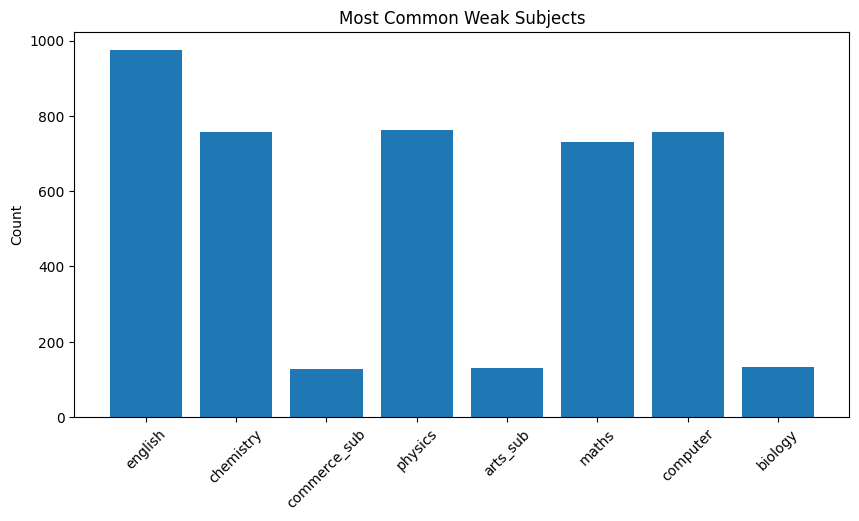

In [115]:

# Visualizing common weaknesses
plt.figure(figsize=(10,5))
plt.bar(all_weak.keys(), all_weak.values())
plt.xticks(rotation=45)
plt.title("Most Common Weak Subjects")
plt.ylabel("Count")
plt.show()


In [116]:
#creating feedback map
feedback_map = {
    "maths": "Practice algebra and daily problem solving",
    "physics": "Revise formulas and practice numericals",
    "chemistry": "Revise reactions and NCERT concepts",
    "biology": "Focus on diagrams and concept clarity",
    "english": "Improve grammar, vocabulary, and reading",
    "computer": "Practice coding and logical thinking",
    "commerce_sub": "Revise accounting and financial basics",
    "arts_sub": "Improve theory understanding and writing"
}


In [117]:
# Generating personalized feedback based on weak subjects
def weak_subject_feedback(weak_list, critical_list):
    feedback = []
    
    for sub in critical_list:
        feedback.append(f" CRITICAL in {sub.upper()}: {feedback_map[sub]}")
    
    for sub in weak_list:
        feedback.append(f" Needs Improvement in {sub.upper()}: {feedback_map[sub]}")
    
    if not weak_list and not critical_list:
        feedback.append(" No major weak subjects — Keep up the good work")
    
    return feedback

df["personalized_feedback"] = df.apply(
    lambda row: weak_subject_feedback(row["weak_subjects"], row["critical_subjects"]),
    axis=1
)


In [118]:
# Assessing overall subject risk level
def subject_risk_level(row):
    score = 0
    
    score += len(row["critical_subjects"]) * 3
    score += len(row["weak_subjects"]) * 1
    
    if row["avg_marks"] < 45:
        score += 2
    
    if row["study_hours"] < 1.5:
        score += 1
    
    if score >= 6:
        return "High Risk"
    elif score >= 3:
        return "Medium Risk"
    return "Low Risk"

df["risk_level"] = df.apply(subject_risk_level, axis=1)


In [119]:
#  Course Mapping

course_map_9_10 = {
    "maths": [
        "CBSE Mathematics Class 9–10 (PW)",
        "PW Foundation Maths Course",
        "Vedantu Maths for Class 9–10"
    ],
    "science": [
        "CBSE Science Class 9–10 (PW)",
        "PW Science Foundation Course",
        "Byju’s Science Course for Class 9–10"
    ],
    "physics": [
        "PW Physics Basics for Class 9–10",
        "Unacademy Physics Foundation"
    ],
    "chemistry": [
        "PW Chemistry Basics (Class 9–10)",
        "Vedantu Chemistry Foundation"
    ],
    "biology": [
        "PW Biology Basics (Class 9–10)",
        "Byju’s Biology for Class 9–10"
    ],
    "english": [
        "PW English Grammar & Writing",
        "Spoken English Course (Indian Context)",
        "Vedantu English for CBSE"
    ],
    "computer": [
        "Basic Computer Course (Class 9–10)",
        "PW Python for Beginners",
        "Coding for Kids (India)"
    ]
}


course_map_11_12 = {
    "maths": [
        "CBSE Mathematics Class 11–12 (PW)",
        "PW JEE Maths Foundation",
        "Unacademy Class 11–12 Maths"
    ],
    "physics": [
        "CBSE Physics Class 11–12 (PW)",
        "PW JEE Physics Foundation",
        "Vedantu Physics Course"
    ],
    "chemistry": [
        "CBSE Chemistry Class 11–12 (PW)",
        "PW NEET/JEE Chemistry Foundation",
        "Unacademy Chemistry Course"
    ],
    "biology": [
        "CBSE Biology Class 11–12 (PW)",
        "PW NEET Biology Foundation",
        "Byju’s Biology for NEET"
    ],
    "english": [
        "CBSE English Core Class 11–12",
        "PW English Writing & Literature",
        "Spoken English & Communication"
    ],
    "computer": [
        "CBSE Computer Science / IP",
        "PW Python & SQL Basics",
        "Basic Data Structures for Beginners"
    ],
    "commerce_sub": [
        "CBSE Accountancy Class 11–12",
        "PW Commerce Foundation Course",
        "CA Foundation Basics (PW)"
    ],
    "arts_sub": [
        "CBSE Political Science Class 11–12",
        "PW Humanities Course",
        "Sociology Basics (CBSE)"
    ]
}

In [125]:
# Risk Level Course intensity 
risk_course_multiplier = {
    "Low Risk": 1,
    "Medium Risk": 2,
    "High Risk": 3
}

In [126]:
# Generating course recommendations based on weak subjects and risk level
def recommend_courses(row):


    cls = row["class"]
    weak_subjects = row["weak_subjects"] + row["critical_subjects"]
    risk = row["risk_level"]
    
    course_map = course_map_9_10 if cls <= 10 else course_map_11_12
    
    recommendations = {}
    
    for subject in weak_subjects:
        courses = course_map.get(subject, [])
        
        if len(courses) > 0:
            recommendations[subject] = courses
    
    if len(recommendations) == 0:
        recommendations["general"] = ["Maintain Performance Program"]
    
    return recommendations

In [ ]:
# Applying course recommendation function 
df["recommended_courses"] = df.apply(recommend_courses, axis=1)

In [124]:
# Checking weakness feedback for a sample student


test_student = {
"class": 12,
"stream": "Non Medical",
# Subject marks
"physics": 80,
"chemistry": 65,
"maths": 67,
"english": 53,
"computer": 33,
"biology": None,
"commerce_sub": None,
"arts_sub": None,
"avg_marks": 78,
"study_hours": 5
}


# Convert to DataFrame
sample = pd.DataFrame([test_student])

sample["weak_subjects"], sample["critical_subjects"] = zip(
*sample.apply(detect_weak_subjects, axis=1)
)


# Generate feedback
sample["personalized_feedback"] = sample.apply(
lambda row: weak_subject_feedback(row["weak_subjects"], row["critical_subjects"]),
axis=1
)


# Generate risk level
sample["risk_level"] = sample.apply(subject_risk_level, axis=1)
sample["recommended_courses"] = sample.apply(recommend_courses, axis=1)

# Print result cleanly
row = sample.iloc[0]


print("Class:", row["class"])
print("Stream:", row["stream"])
print("Weak Subjects:", row["weak_subjects"])
print("Critical Subjects:", row["critical_subjects"])
print("Risk Level:", row["risk_level"])
print("\nFeedback:")
for f in row["personalized_feedback"]:
      print("-", f)
print("\nRecommended Courses:")

for subject, courses in row["recommended_courses"].items():
    course_text = ", ".join(courses)
    print(f"- {subject.upper()}: {course_text}")

Class: 12
Stream: Non Medical
Weak Subjects: ['english']
Critical Subjects: ['computer']
Risk Level: Medium Risk

Feedback:
-  CRITICAL in COMPUTER: Practice coding and logical thinking
-  Needs Improvement in ENGLISH: Improve grammar, vocabulary, and reading

Recommended Courses:
- ENGLISH: CBSE English Core Class 11–12, PW English Writing & Literature, Spoken English & Communication
- COMPUTER: CBSE Computer Science / IP, PW Python & SQL Basics, Basic Data Structures for Beginners
